In [122]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [123]:
raw_data_file_name= "Clustered_Data/dilum_sir_route.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceY,anomaly,cluster,lat,lon,time
0,10.049045,A,0,6.751611,79.954563,1538099035718
1,10.021320,A,0,6.751611,79.954563,1538099036418
2,10.019883,A,1,6.751562,79.954525,1538099037119
3,10.029412,A,1,6.751562,79.954525,1538099037320
4,10.089938,A,1,6.751562,79.954525,1538099037421


In [124]:
raw_data.shape

(259, 6)

In [125]:
raw_data = raw_data.sort_values(by=['cluster'])

In [126]:
raw_data.head(5)

,acceY,anomaly,cluster,lat,lon,time
0,10.049045,A,0,6.751611,79.954563,1538099035718
1,10.021320,A,0,6.751611,79.954563,1538099036418
90,10.021320,A,0,6.751611,79.954563,1538099036418
89,10.049045,A,0,6.751611,79.954563,1538099035718
179,10.377290,A,0,6.751599,79.954554,1538358332510


In [127]:
raw_data = raw_data.groupby(['cluster']).mean()
raw_data

,acceY,lat,lon,time
cluster,,,,
0,10.115487,6.751606,79.954559,1.538210e+12
1,10.089922,6.751552,79.954524,1.538185e+12
2,10.139511,6.751405,79.954411,1.538170e+12
3,10.153740,6.751344,79.954364,1.538136e+12
4,10.035446,6.745696,79.952092,1.538099e+12
5,10.159248,6.743954,79.949601,1.538170e+12
6,10.249977,6.743608,79.949089,1.538186e+12
7,10.118374,6.743389,79.947309,1.538210e+12
8,10.103010,6.740071,79.942062,1.538164e+12


In [128]:
raw_data.head()

,acceY,lat,lon,time
cluster,,,,
0,10.115487,6.751606,79.954559,1.538210e+12
1,10.089922,6.751552,79.954524,1.538185e+12
2,10.139511,6.751405,79.954411,1.538170e+12
3,10.153740,6.751344,79.954364,1.538136e+12
4,10.035446,6.745696,79.952092,1.538099e+12


In [129]:
raw_data.shape

(27, 4)

In [130]:
raw_data = pd.DataFrame(raw_data).reset_index()

In [131]:
raw_data.head()

,cluster,acceY,lat,lon,time
0,0,10.115487,6.751606,79.954559,1.538210e+12
1,1,10.089922,6.751552,79.954524,1.538185e+12
2,2,10.139511,6.751405,79.954411,1.538170e+12
3,3,10.153740,6.751344,79.954364,1.538136e+12
4,4,10.035446,6.745696,79.952092,1.538099e+12


In [132]:
raw_data.shape

(27, 5)

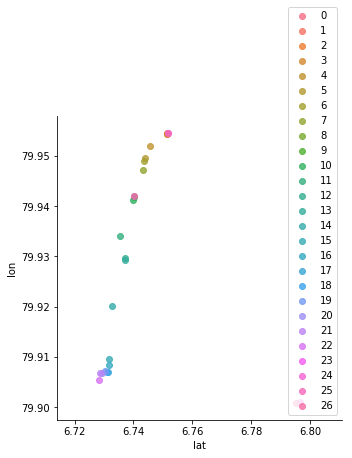

In [133]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [134]:
raw_data.to_json("Map_data/dilum_sir_route.json", orient='records')